In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing the DataSet

In [2]:
DF = pd.read_csv("cancer_reg.csv", encoding='latin')

# Exploring the data

In [3]:
DF.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

We notice that there are some rows that having null values

# Choosing the predictor

In [5]:
DF.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


# Part1 : Data Analysis 

* Explore the columns that have null values 
* fill the null values with zeros
* plot the average target death rate per year for each city for the 16 years

array([[<Axes: title={'center': 'avgAnnCount'}>,
        <Axes: title={'center': 'avgDeathsPerYear'}>,
        <Axes: title={'center': 'TARGET_deathRate'}>,
        <Axes: title={'center': 'incidenceRate'}>,
        <Axes: title={'center': 'medIncome'}>,
        <Axes: title={'center': 'popEst2015'}>],
       [<Axes: title={'center': 'povertyPercent'}>,
        <Axes: title={'center': 'studyPerCap'}>,
        <Axes: title={'center': 'MedianAge'}>,
        <Axes: title={'center': 'MedianAgeMale'}>,
        <Axes: title={'center': 'MedianAgeFemale'}>,
        <Axes: title={'center': 'AvgHouseholdSize'}>],
       [<Axes: title={'center': 'PercentMarried'}>,
        <Axes: title={'center': 'PctNoHS18_24'}>,
        <Axes: title={'center': 'PctHS18_24'}>,
        <Axes: title={'center': 'PctSomeCol18_24'}>,
        <Axes: title={'center': 'PctBachDeg18_24'}>,
        <Axes: title={'center': 'PctHS25_Over'}>],
       [<Axes: title={'center': 'PctBachDeg25_Over'}>,
        <Axes: title={'cent

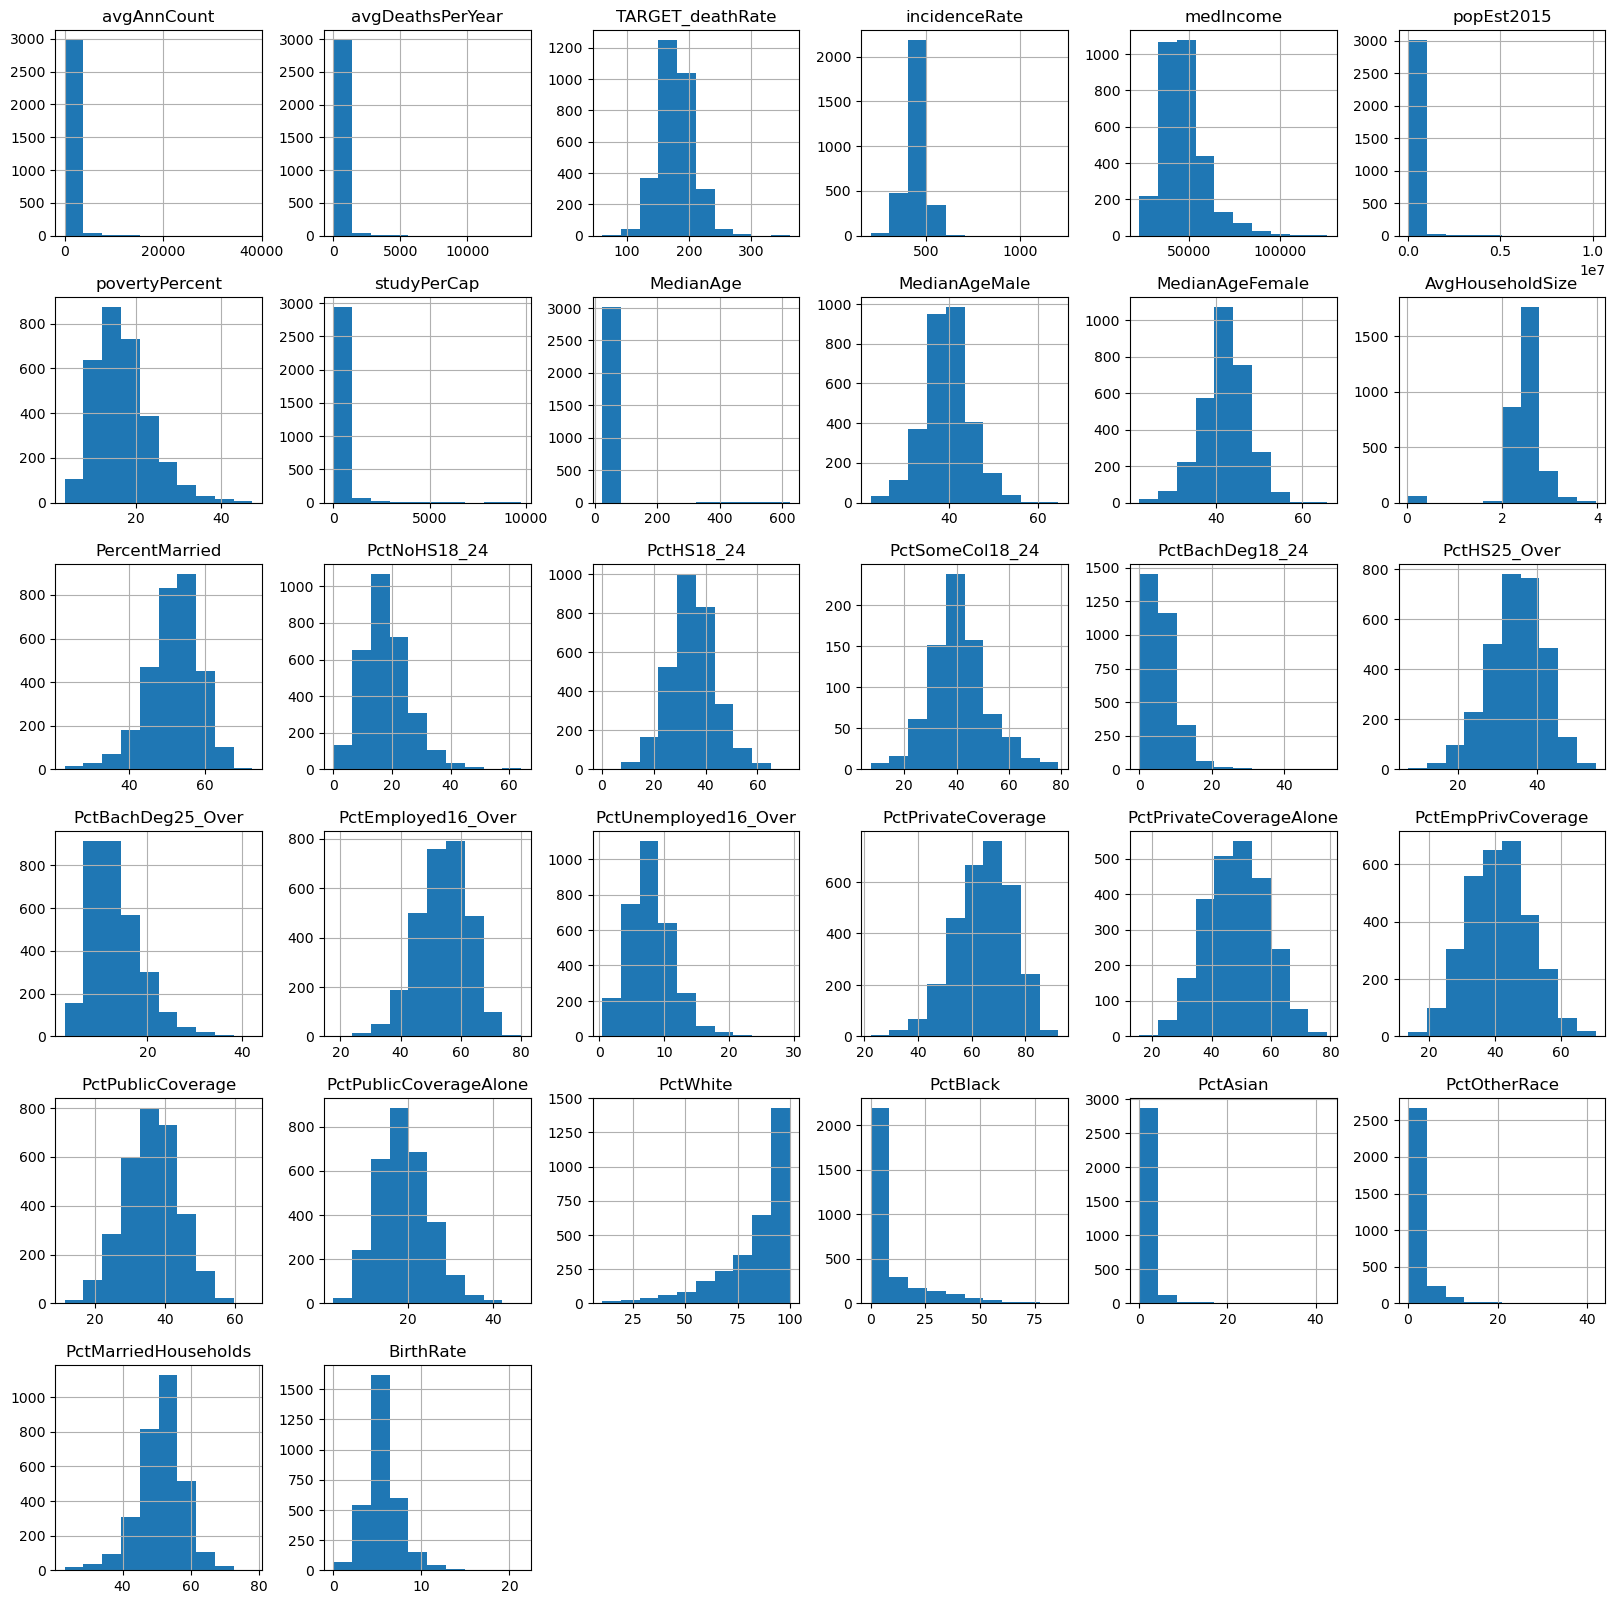

In [6]:
DF.hist(figsize=(20,20))

In [7]:
DF.isna().any()

avgAnnCount                False
avgDeathsPerYear           False
TARGET_deathRate           False
incidenceRate              False
medIncome                  False
popEst2015                 False
povertyPercent             False
studyPerCap                False
binnedInc                  False
MedianAge                  False
MedianAgeMale              False
MedianAgeFemale            False
Geography                  False
AvgHouseholdSize           False
PercentMarried             False
PctNoHS18_24               False
PctHS18_24                 False
PctSomeCol18_24             True
PctBachDeg18_24            False
PctHS25_Over               False
PctBachDeg25_Over          False
PctEmployed16_Over          True
PctUnemployed16_Over       False
PctPrivateCoverage         False
PctPrivateCoverageAlone     True
PctEmpPrivCoverage         False
PctPublicCoverage          False
PctPublicCoverageAlone     False
PctWhite                   False
PctBlack                   False
PctAsian  

we notice that the columns "PctSomeCol18_24" , "PctEmployed16_Over", and "PctPrivateCoverageAlone" have null values

array([[<Axes: title={'center': 'avgAnnCount'}>,
        <Axes: title={'center': 'avgDeathsPerYear'}>,
        <Axes: title={'center': 'TARGET_deathRate'}>,
        <Axes: title={'center': 'incidenceRate'}>,
        <Axes: title={'center': 'medIncome'}>,
        <Axes: title={'center': 'popEst2015'}>],
       [<Axes: title={'center': 'povertyPercent'}>,
        <Axes: title={'center': 'studyPerCap'}>,
        <Axes: title={'center': 'MedianAge'}>,
        <Axes: title={'center': 'MedianAgeMale'}>,
        <Axes: title={'center': 'MedianAgeFemale'}>,
        <Axes: title={'center': 'AvgHouseholdSize'}>],
       [<Axes: title={'center': 'PercentMarried'}>,
        <Axes: title={'center': 'PctNoHS18_24'}>,
        <Axes: title={'center': 'PctHS18_24'}>,
        <Axes: title={'center': 'PctSomeCol18_24'}>,
        <Axes: title={'center': 'PctBachDeg18_24'}>,
        <Axes: title={'center': 'PctHS25_Over'}>],
       [<Axes: title={'center': 'PctBachDeg25_Over'}>,
        <Axes: title={'cent

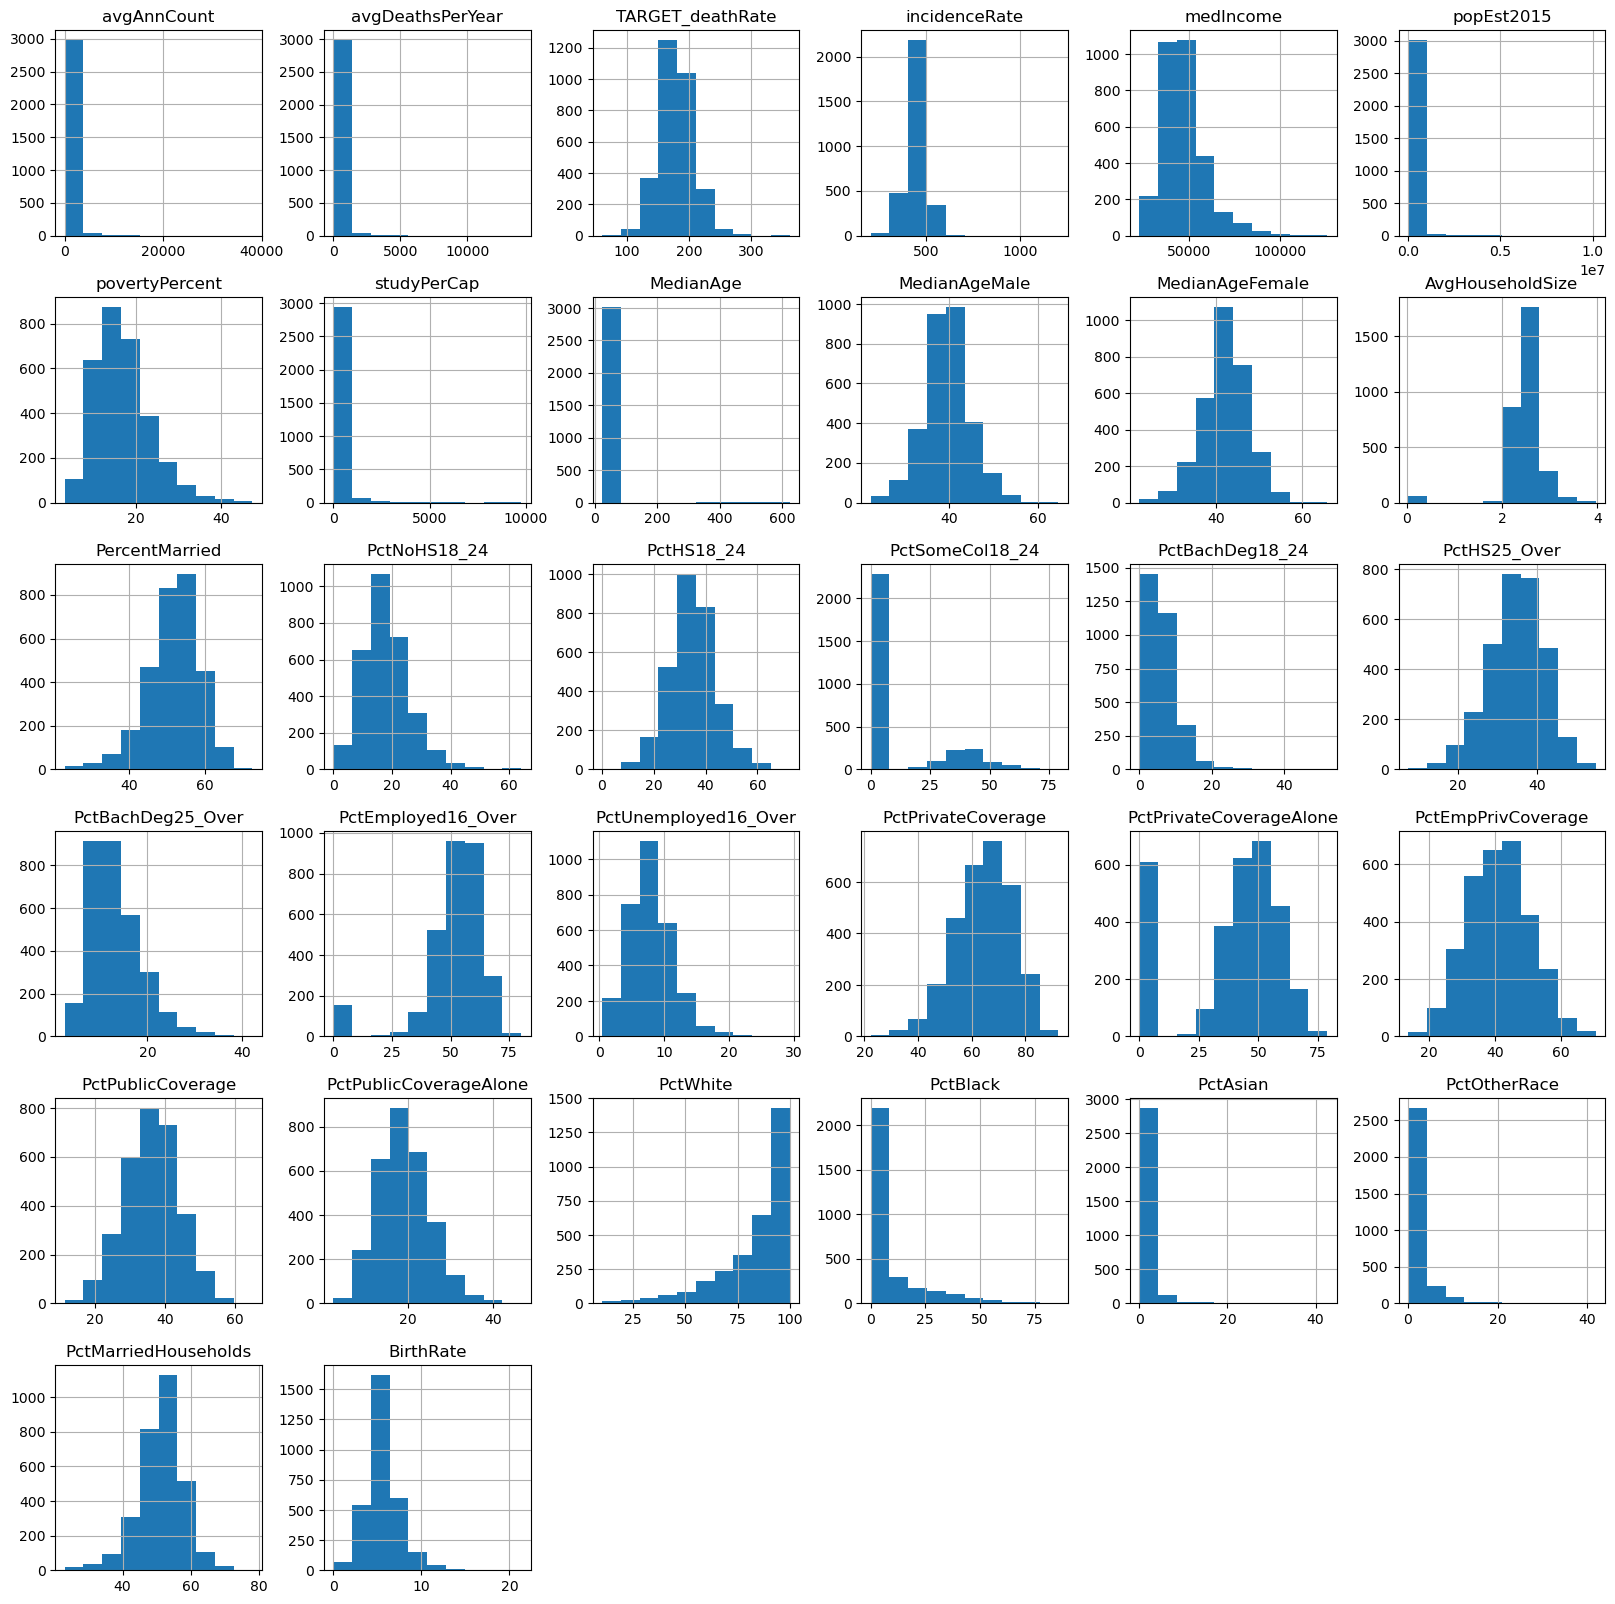

In [8]:
# fill the null values with zeros
# DF.fillna(0 , inplace=True)
DF.fillna(0).hist(figsize=(20,20))

# DF.hist(figsize=(20,20))

In [9]:
# DF.dropna().hist(figsize=(20,20))


array([[<Axes: title={'center': 'avgAnnCount'}>,
        <Axes: title={'center': 'avgDeathsPerYear'}>,
        <Axes: title={'center': 'TARGET_deathRate'}>,
        <Axes: title={'center': 'incidenceRate'}>,
        <Axes: title={'center': 'medIncome'}>,
        <Axes: title={'center': 'popEst2015'}>],
       [<Axes: title={'center': 'povertyPercent'}>,
        <Axes: title={'center': 'studyPerCap'}>,
        <Axes: title={'center': 'MedianAge'}>,
        <Axes: title={'center': 'MedianAgeMale'}>,
        <Axes: title={'center': 'MedianAgeFemale'}>,
        <Axes: title={'center': 'AvgHouseholdSize'}>],
       [<Axes: title={'center': 'PercentMarried'}>,
        <Axes: title={'center': 'PctNoHS18_24'}>,
        <Axes: title={'center': 'PctHS18_24'}>,
        <Axes: title={'center': 'PctBachDeg18_24'}>,
        <Axes: title={'center': 'PctHS25_Over'}>,
        <Axes: title={'center': 'PctBachDeg25_Over'}>],
       [<Axes: title={'center': 'PctEmployed16_Over'}>,
        <Axes: title={'c

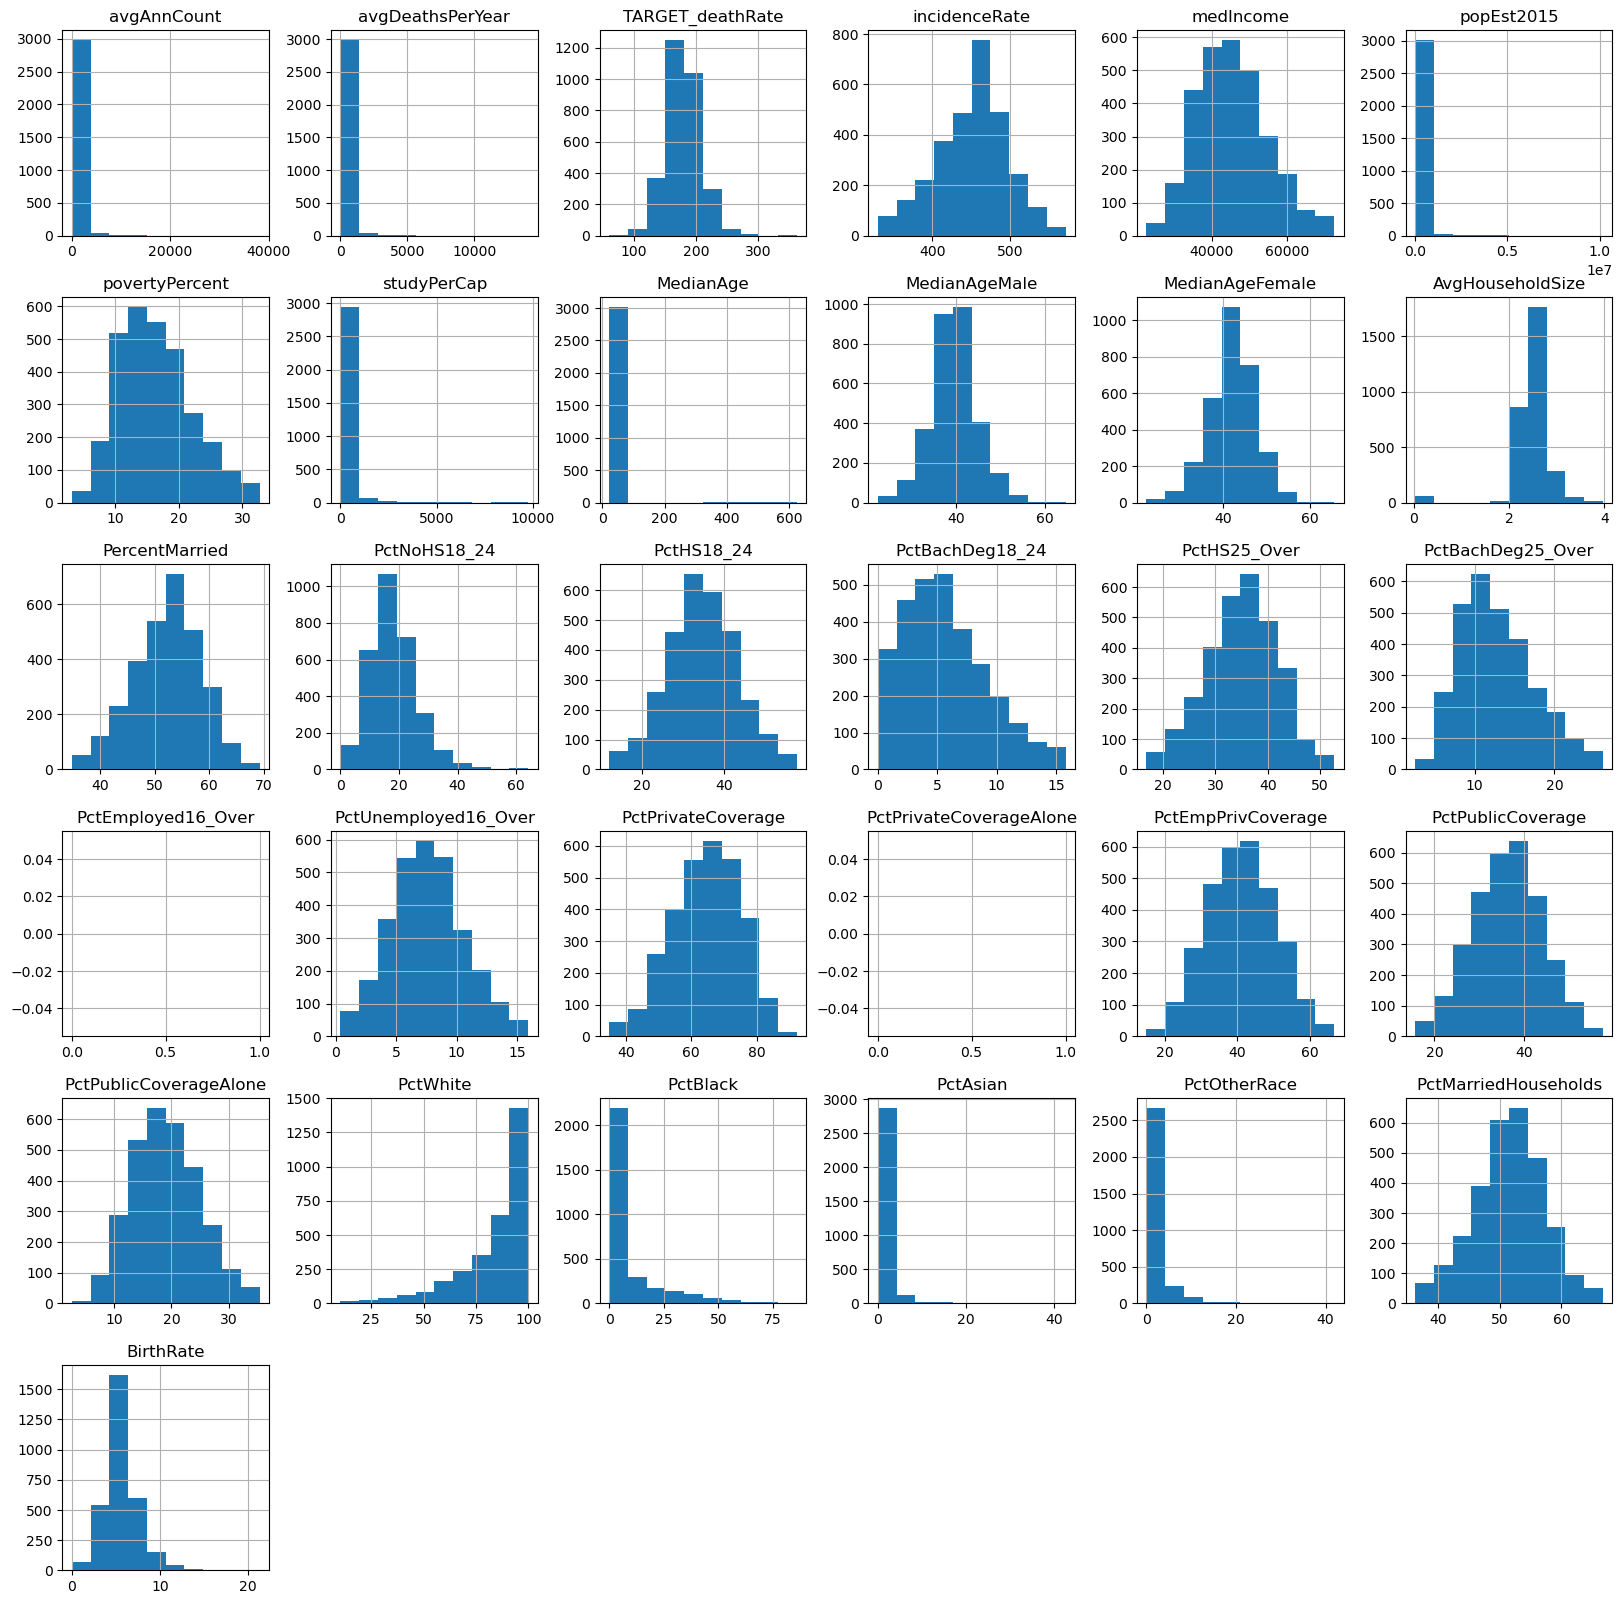

In [23]:
DF["PctSomeCol18_24"].fillna(DF["PctSomeCol18_24"].mean, inplace=True)
DF.hist(figsize=(20,20))


In [24]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            2954 non-null   float64
 4   medIncome                2925 non-null   float64
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           2978 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

### Adding a city & district columns to draw a plot for the average target death rate per year for each city

In [12]:
DF['City'] = DF['Geography'].str.split(',').str[1]
DF['District'] = DF['Geography'].str.split(',').str[0]

<Axes: xlabel='avgDeathsPerYear'>

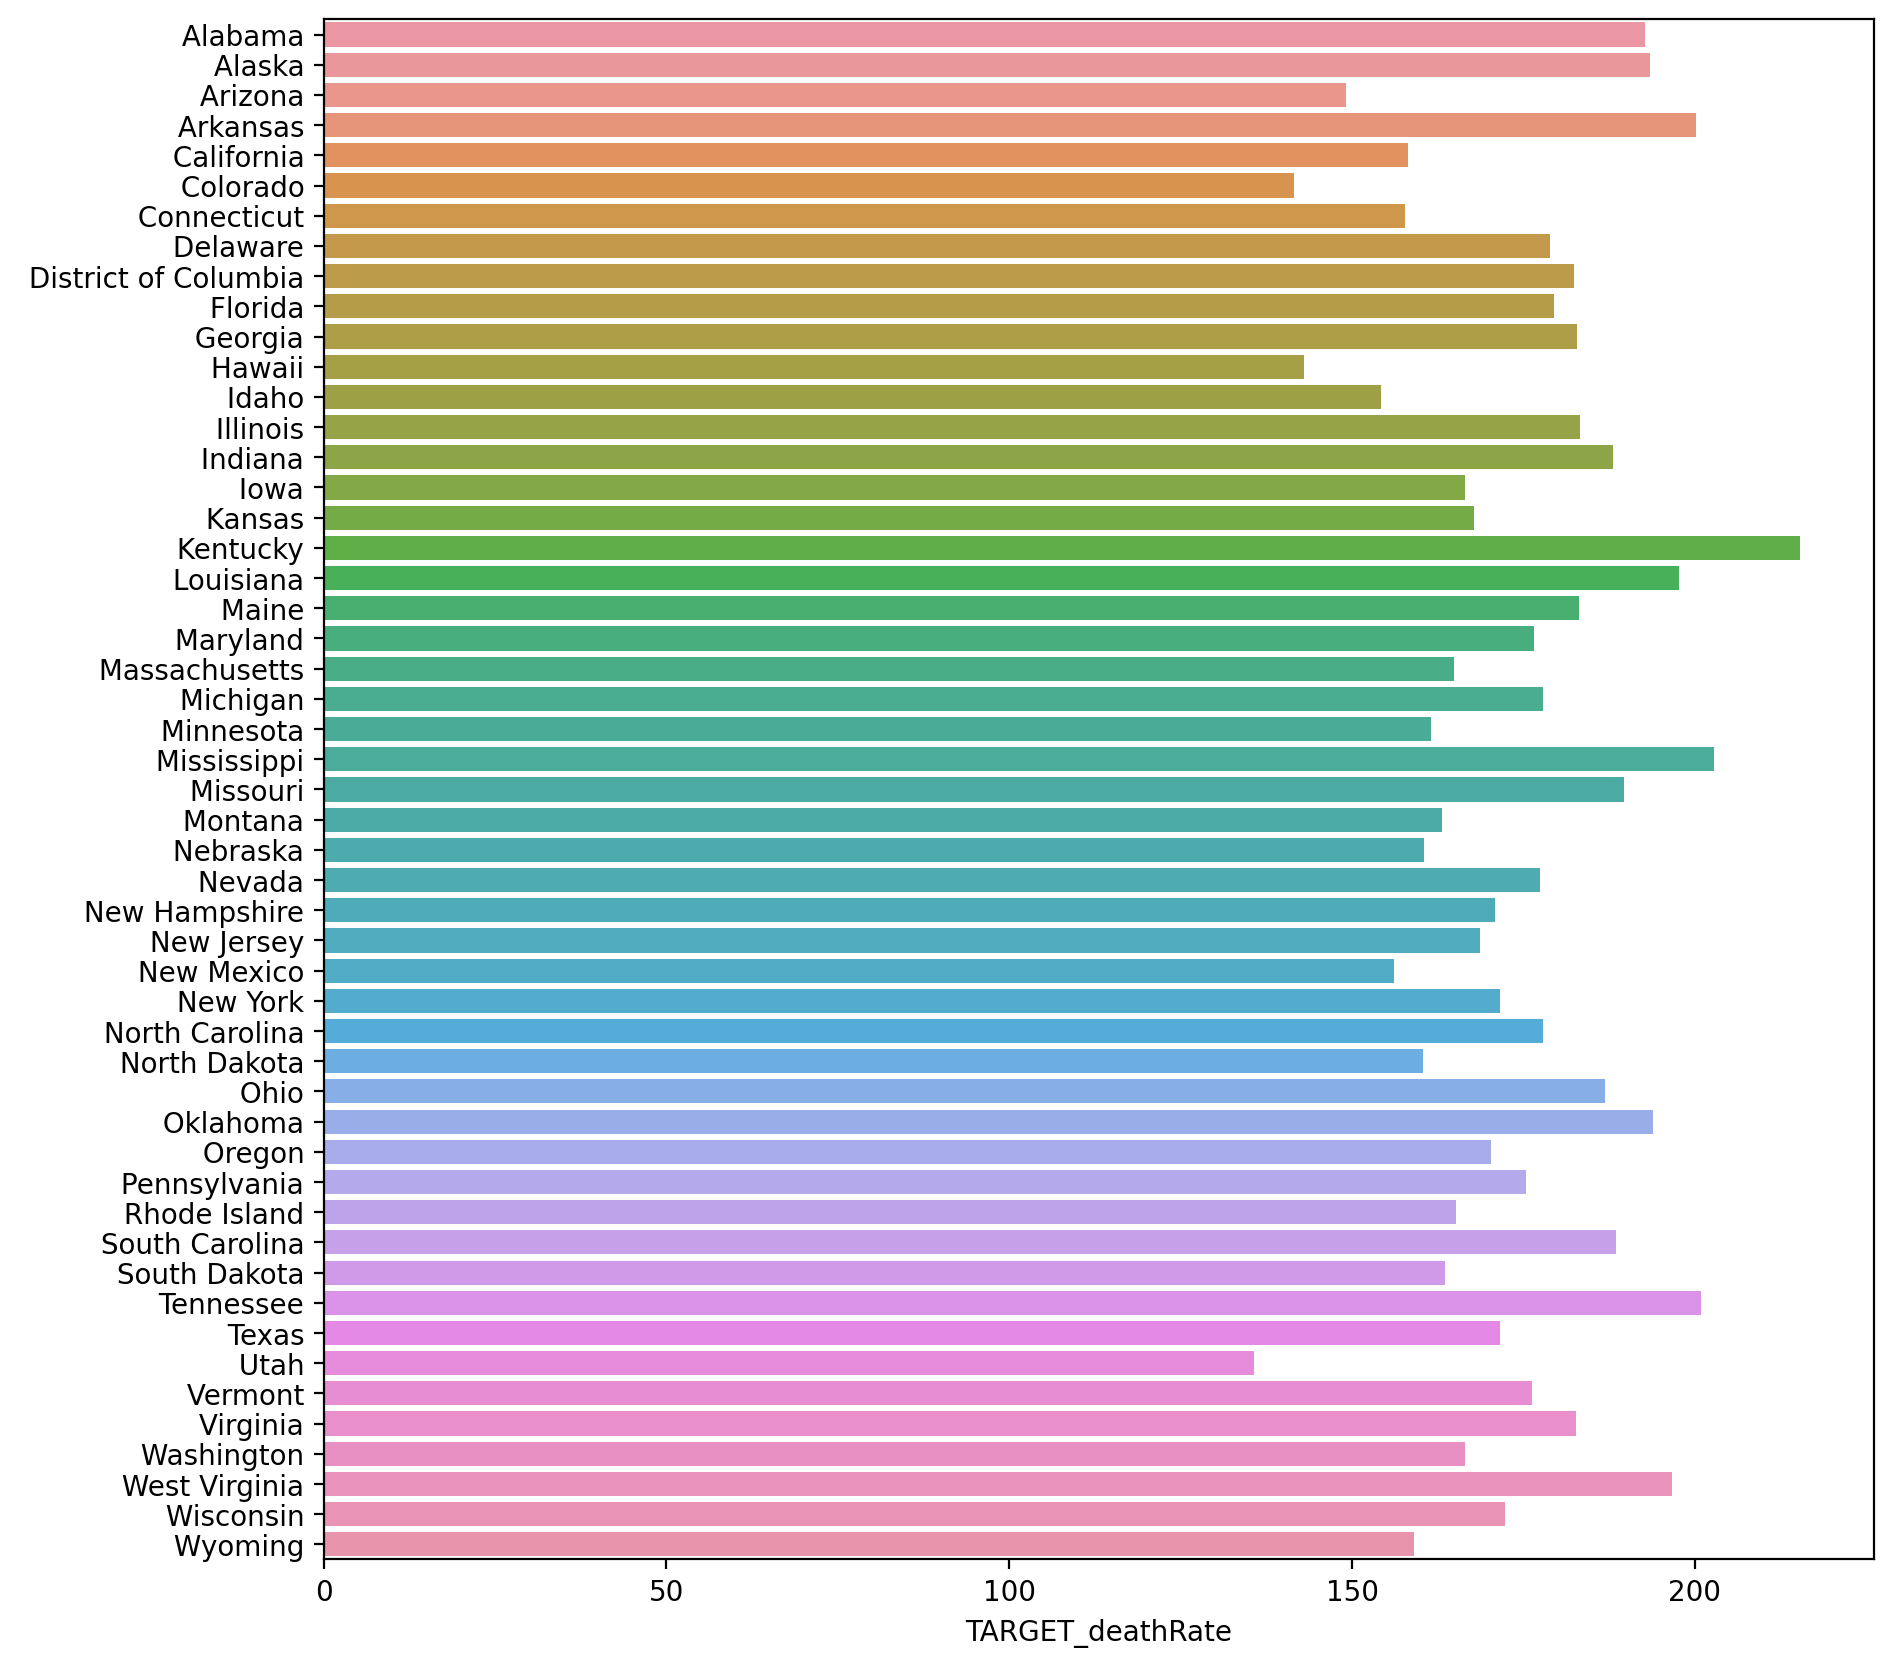

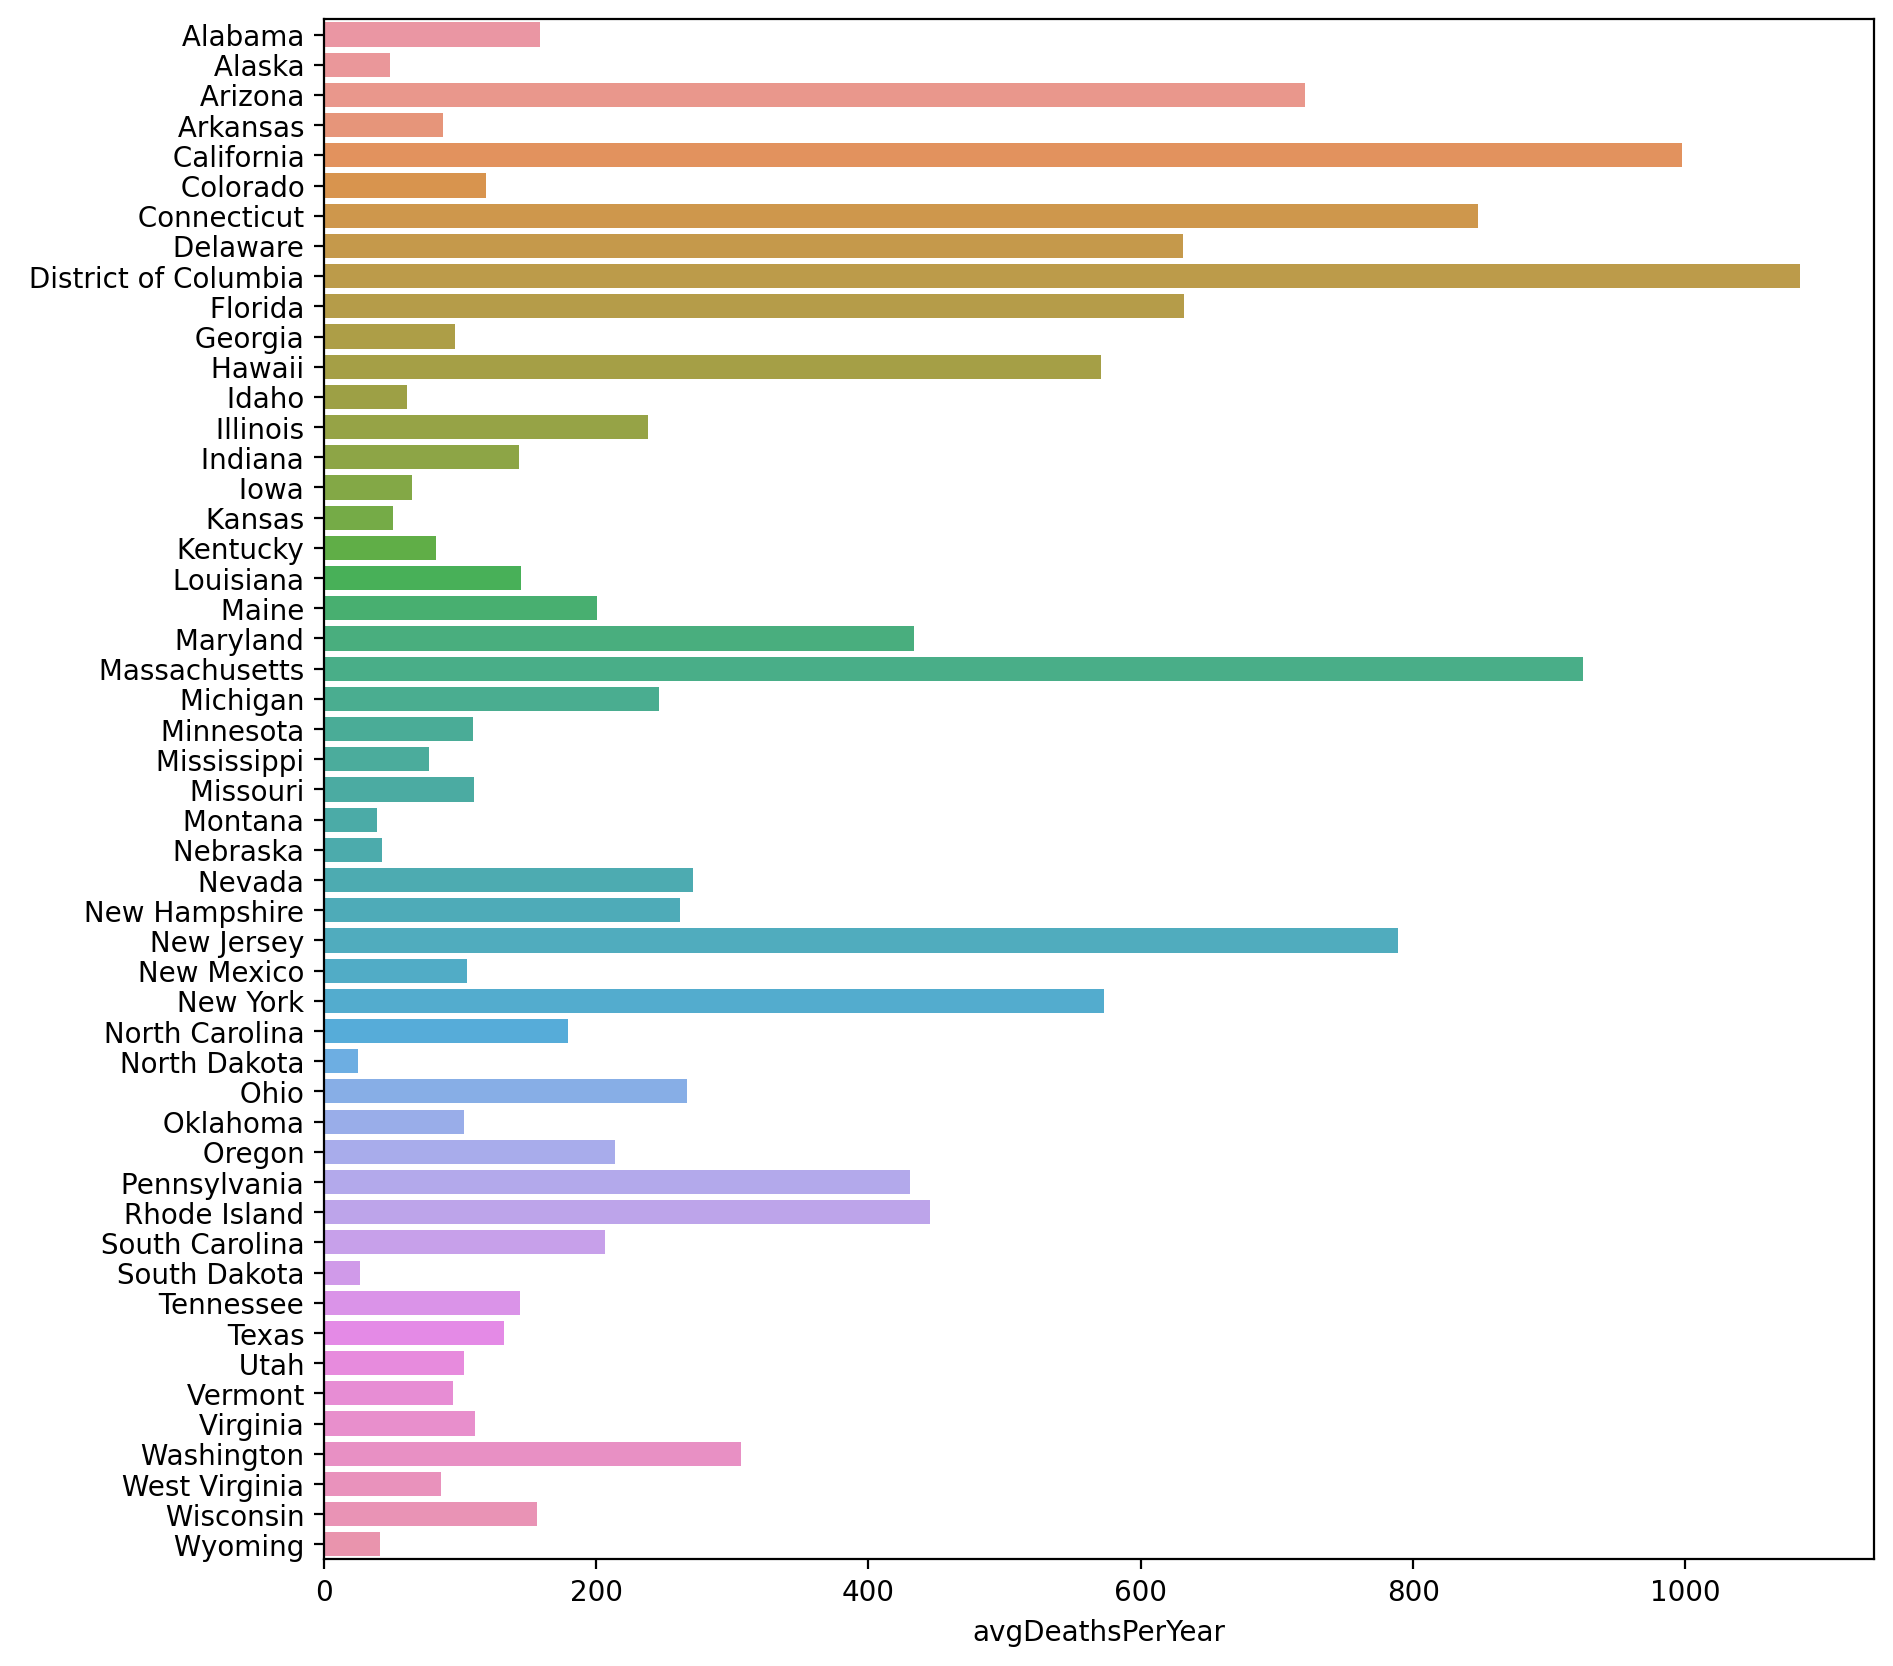

In [13]:
plt.figure(figsize=(10, 10), dpi=200)
sns.barplot(y=DF.sort_values(by='City')['City'].unique()[:], x=DF.groupby('City')['TARGET_deathRate'].mean()[:])
plt.figure(figsize=(10, 10), dpi=200)
sns.barplot(y=DF.sort_values(by='City')['City'].unique()[:], x=DF.groupby('City')['avgDeathsPerYear'].mean()[:])

# Data visualization

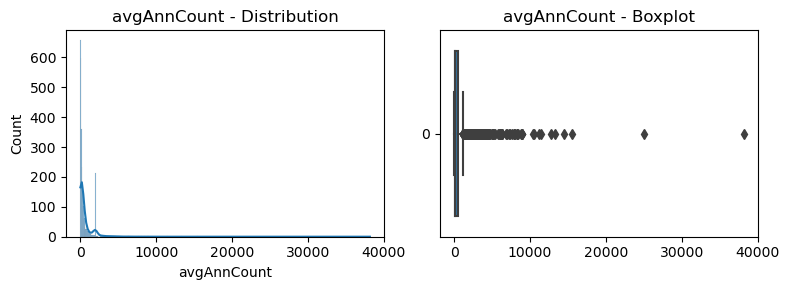

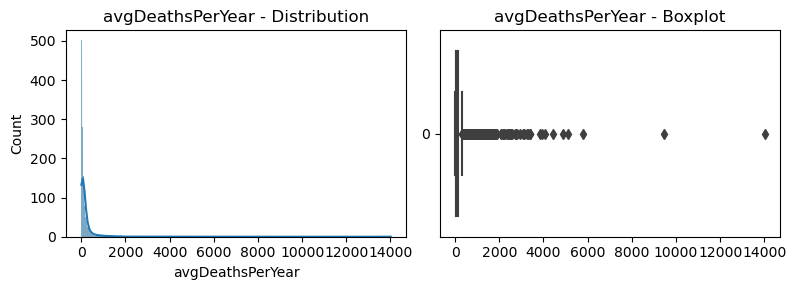

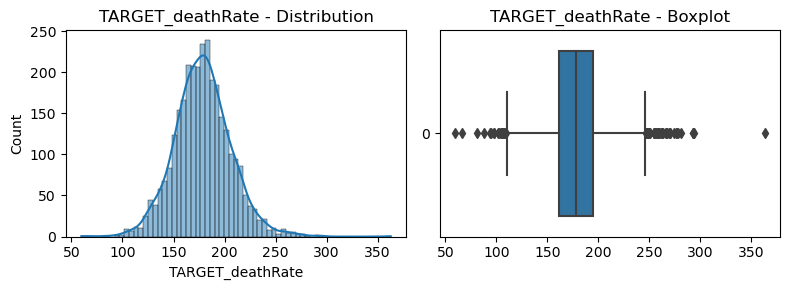

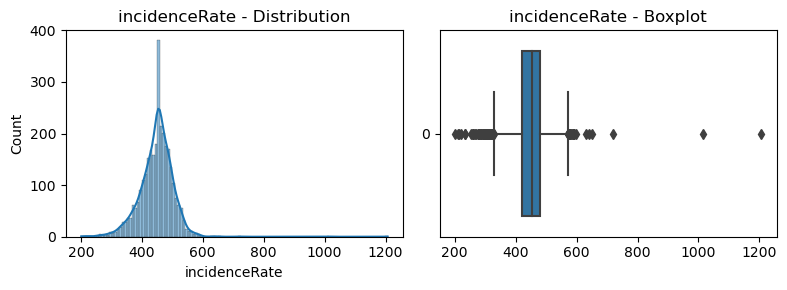

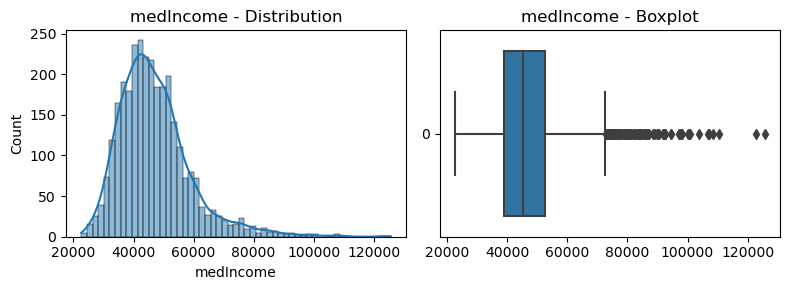

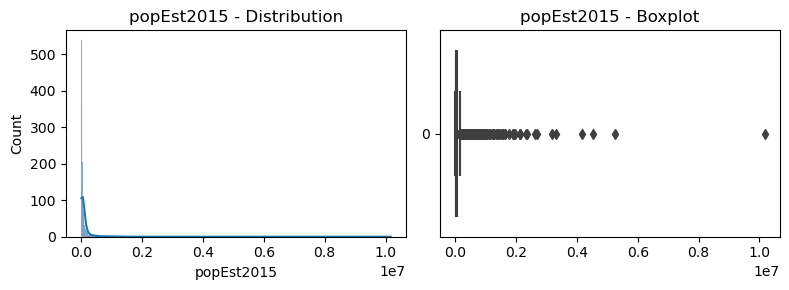

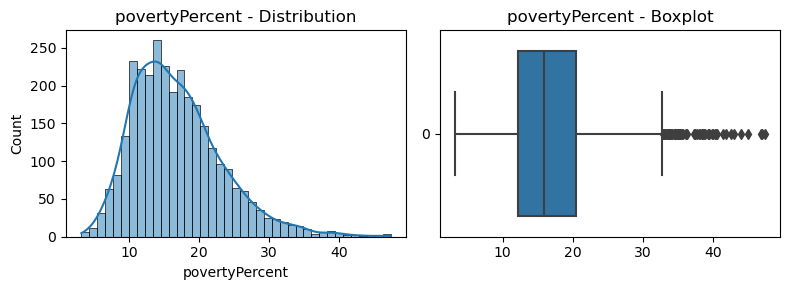

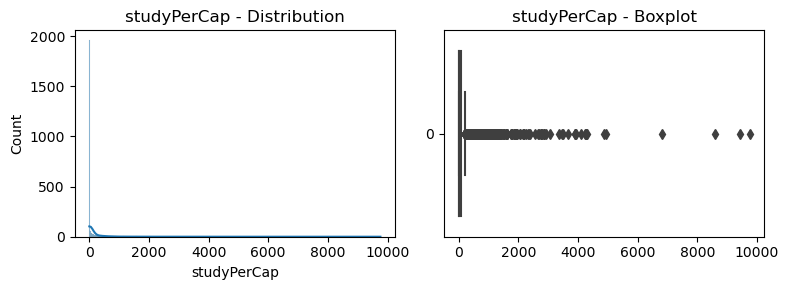

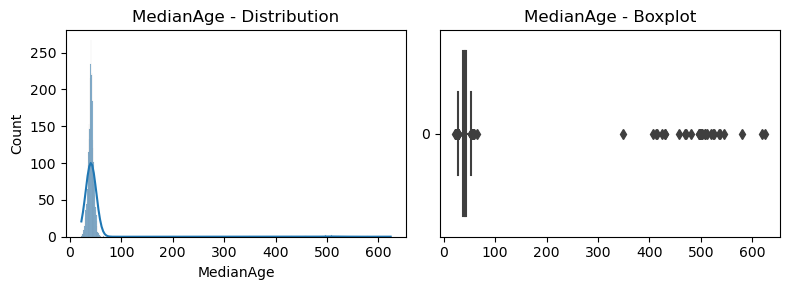

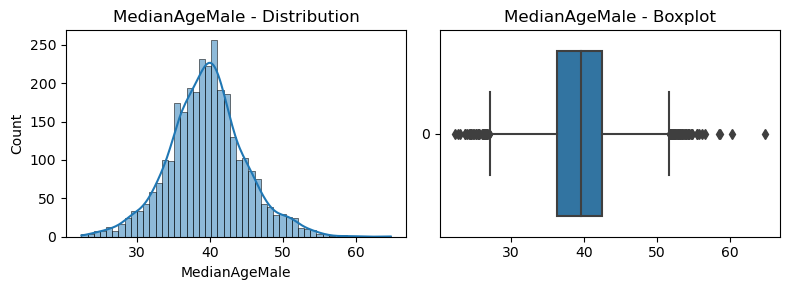

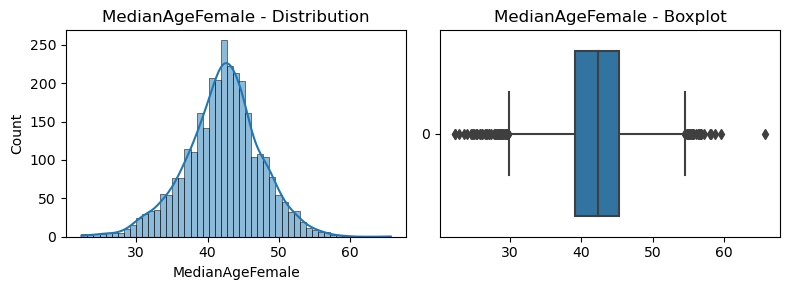

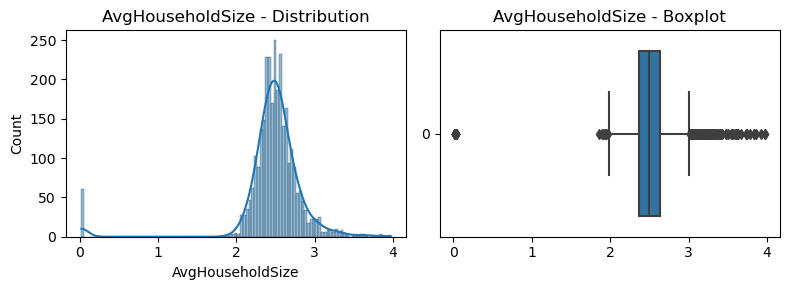

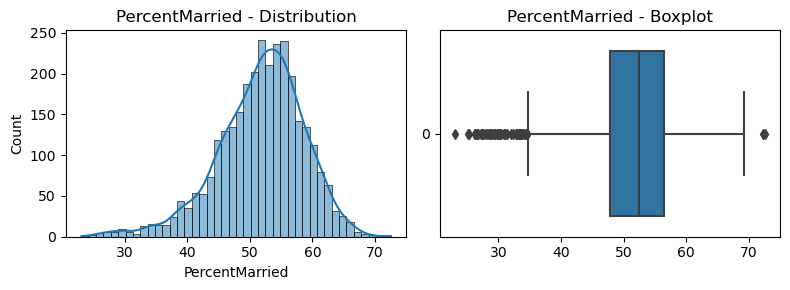

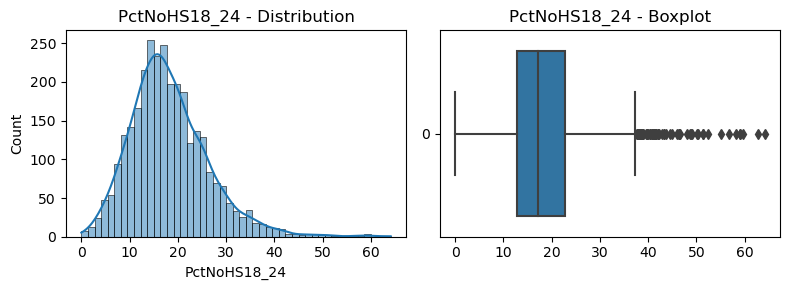

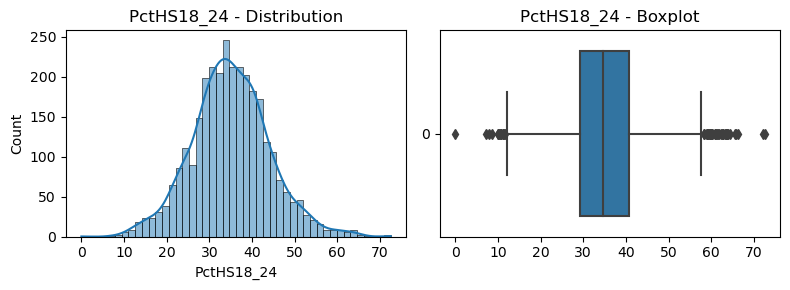

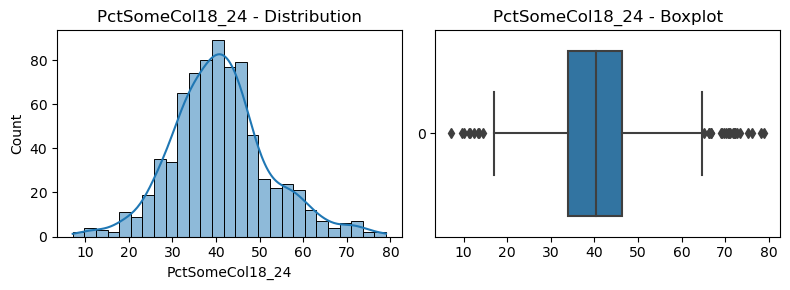

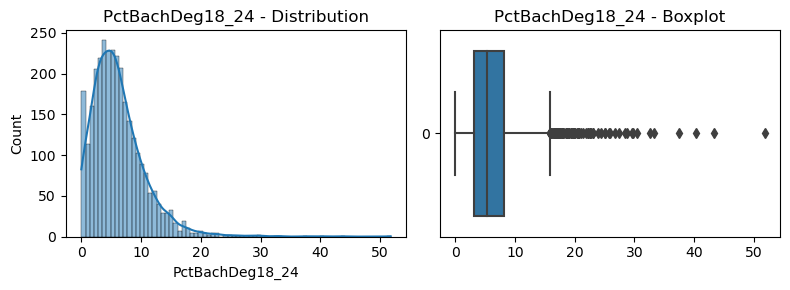

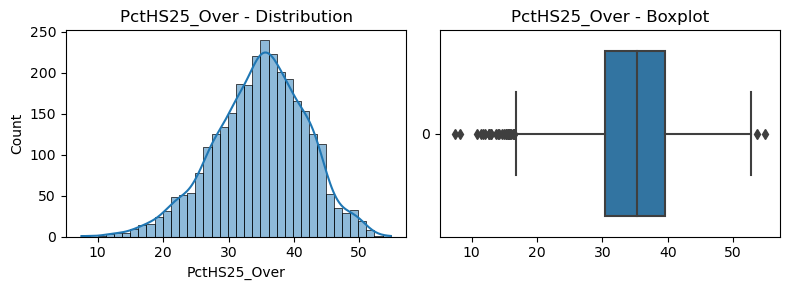

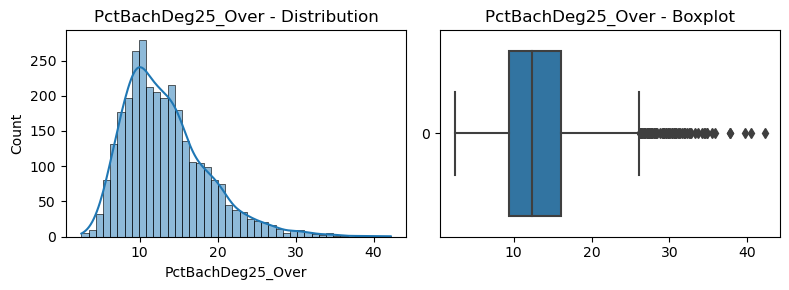

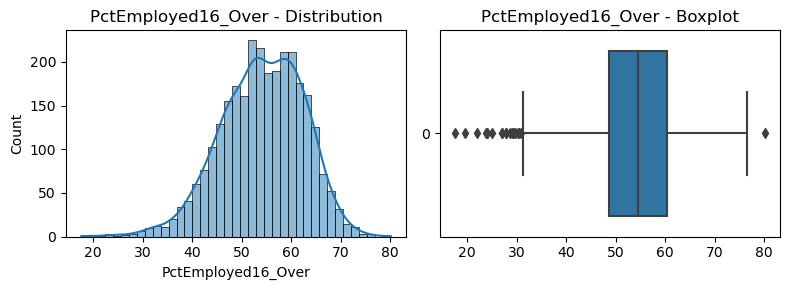

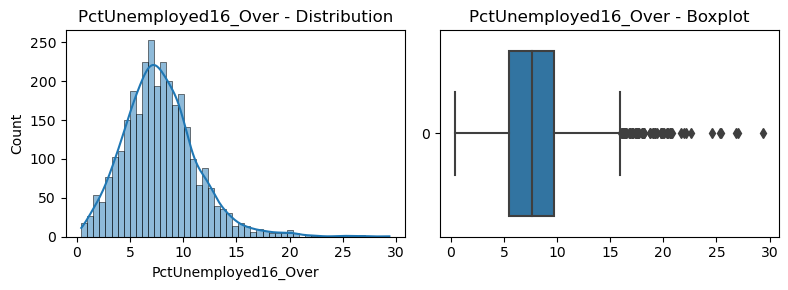

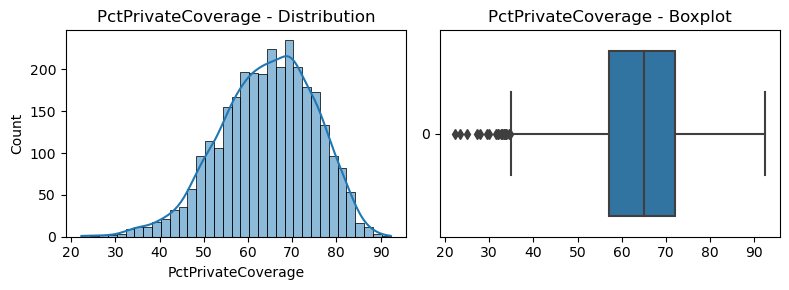

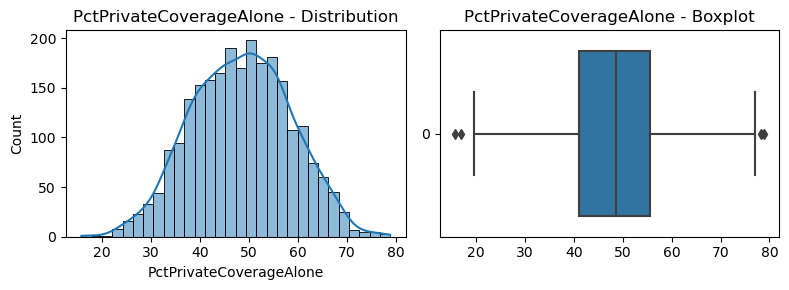

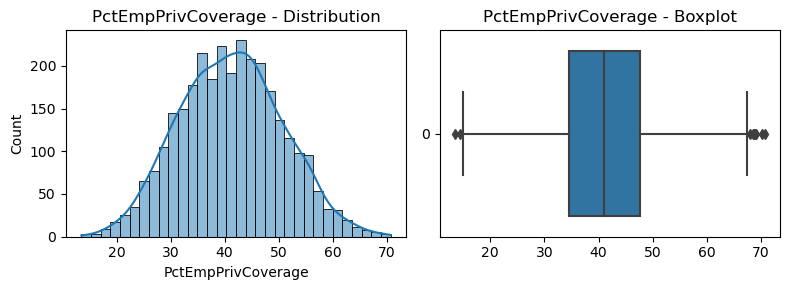

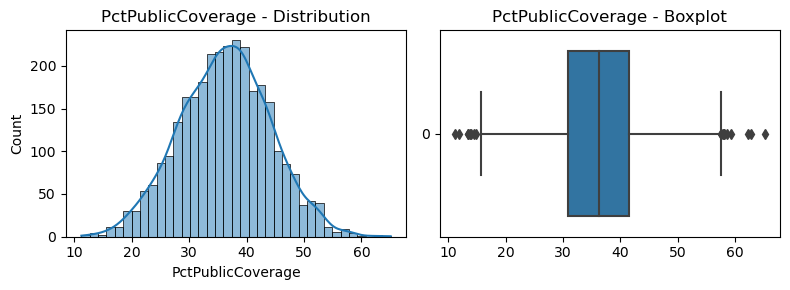

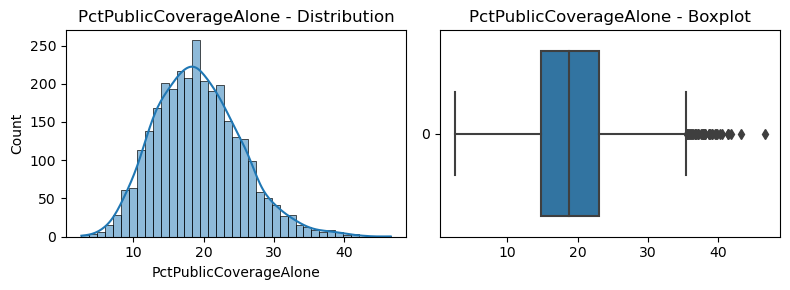

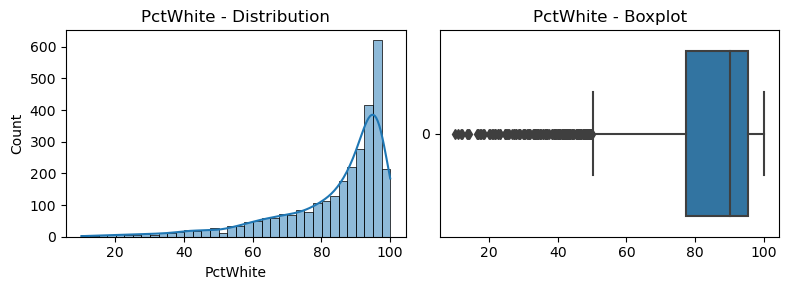

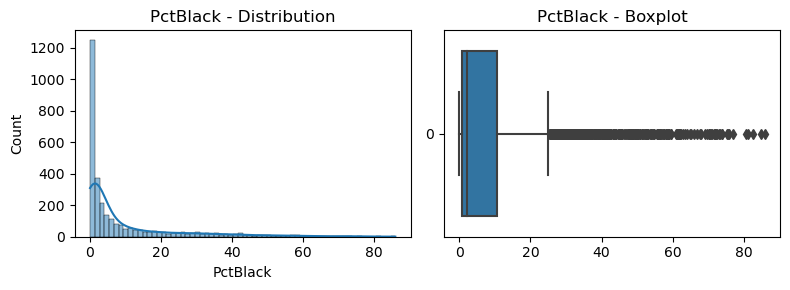

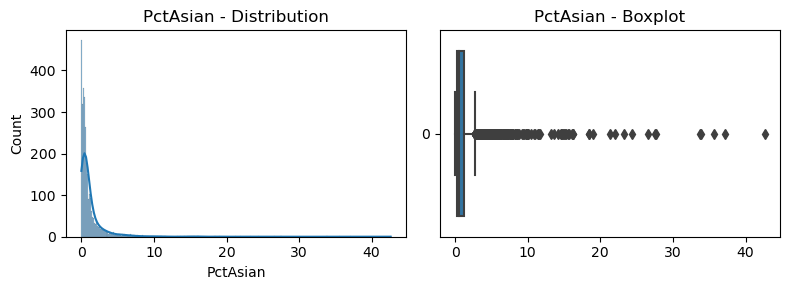

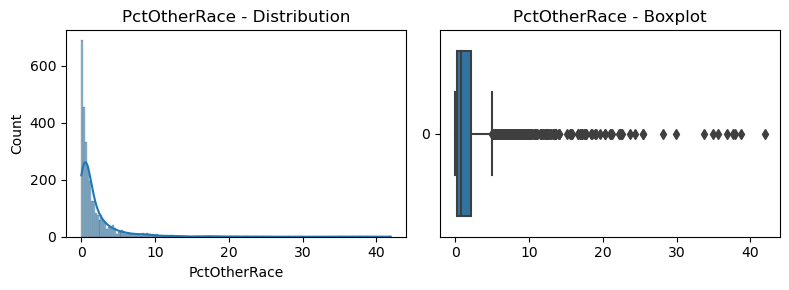

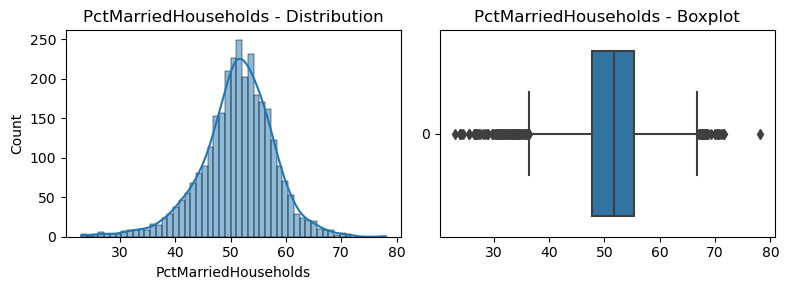

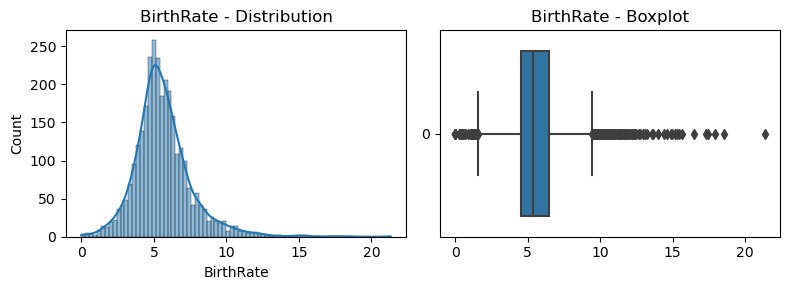

In [14]:
for column in DF.columns:
    if column == 'binnedInc' or column =='City' or column == 'Geography' or column == 'District':
        continue
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))  
    sns.histplot(data=DF[column], kde=True, ax=axes[0])
    sns.boxplot(data=DF[column], ax=axes[1], orient='h')
    axes[0].set_title(f'{column} - Distribution')
    axes[1].set_title(f'{column} - Boxplot')
    plt.tight_layout()
    plt.show()

We notice that there are more than one feature that has outliers  
and there are some features having none-logic data like the medianAge has a value of more than 300

In [15]:
table = DF.corr(method='pearson')
table['TARGET_deathRate']

C:\Users\dell\AppData\Local\Temp\ipykernel_11380\3435418285.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  table = DF.corr(method='pearson')


avgAnnCount               -0.143532
avgDeathsPerYear          -0.090715
TARGET_deathRate           1.000000
incidenceRate              0.449432
medIncome                 -0.428615
popEst2015                -0.120073
povertyPercent             0.429389
studyPerCap               -0.022285
MedianAge                  0.004375
MedianAgeMale             -0.021929
MedianAgeFemale            0.012048
AvgHouseholdSize          -0.036905
PercentMarried            -0.266820
PctNoHS18_24               0.088463
PctHS18_24                 0.261976
PctSomeCol18_24           -0.188688
PctBachDeg18_24           -0.287817
PctHS25_Over               0.404589
PctBachDeg25_Over         -0.485477
PctEmployed16_Over        -0.412046
PctUnemployed16_Over       0.378412
PctPrivateCoverage        -0.386066
PctPrivateCoverageAlone   -0.363704
PctEmpPrivCoverage        -0.267399
PctPublicCoverage          0.404572
PctPublicCoverageAlone     0.449358
PctWhite                  -0.177400
PctBlack                   0

C:\Users\dell\AppData\Local\Temp\ipykernel_11380\205115460.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(DF.corr())


<Axes: >

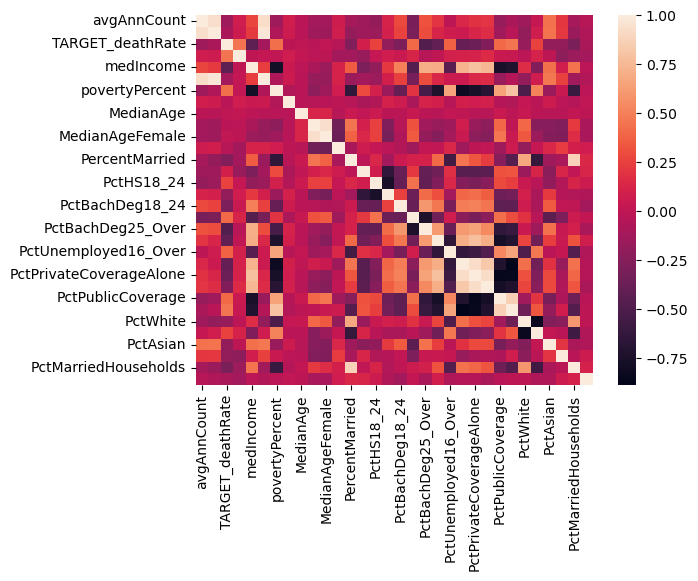

In [16]:
sns.heatmap(DF.corr())

<Axes: >

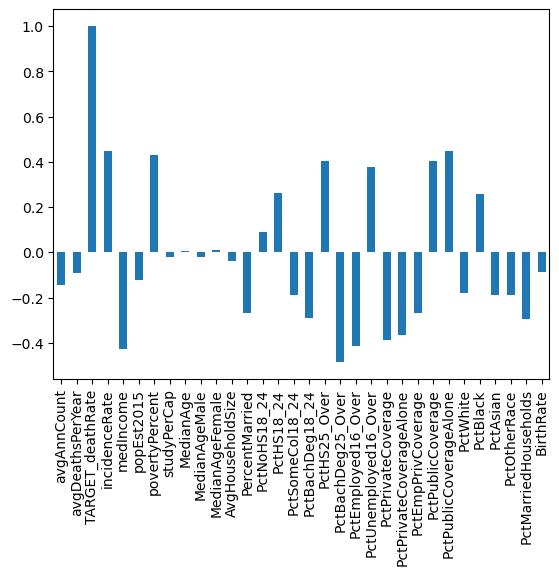

In [17]:
table['TARGET_deathRate'].plot(kind='bar')

In [18]:
target_table = table['TARGET_deathRate']
new_target_table = target_table[['incidenceRate', 'medIncome', 'povertyPercent', 'PercentMarried', 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 
                                'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
                                'PctPublicCoverageAlone', 'PctMarriedHouseholds']]
new_target_table

incidenceRate              0.449432
medIncome                 -0.428615
povertyPercent             0.429389
PercentMarried            -0.266820
PctHS18_24                 0.261976
PctBachDeg18_24           -0.287817
PctHS25_Over               0.404589
PctBachDeg25_Over         -0.485477
PctEmployed16_Over        -0.412046
PctUnemployed16_Over       0.378412
PctPrivateCoverage        -0.386066
PctPrivateCoverageAlone   -0.363704
PctEmpPrivCoverage        -0.267399
PctPublicCoverage          0.404572
PctPublicCoverageAlone     0.449358
PctMarriedHouseholds      -0.293325
Name: TARGET_deathRate, dtype: float64

## Catching outliers 
we can do so using 2 ways 
* Interquartile range 
* Z-score 


  we will go with the z-score(normal distribution) and removing the data points that are not in the area that represents µ ± 3σ.  
  we will have to visualize the data using scatter plot and draw the distribution.  
  box plot will help in identifing the outliers. 

### Interquartile range 


In [19]:
selected = ['incidenceRate', 'medIncome', 'povertyPercent', 'PercentMarried', 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 
                                'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
                                'PctPublicCoverageAlone', 'PctMarriedHouseholds']

In [20]:
for i in selected:
    Q1 = np.percentile(DF[f"{i}"],25,interpolation='midpoint')
    Q2 = np.percentile(DF[f"{i}"],50,interpolation='midpoint')
    Q3 = np.percentile(DF[f"{i}"],75,interpolation='midpoint')
    iqr = Q3-Q1  
    #iqr_with_scipy = stats.iqr(DF[f"{i}"],interpolation='midpoint') using scipy (from scipy import stats)
    DF[f"{i}"] = DF[f"{i}"][(DF[f"{i}"]<(Q3+1.5*iqr)) & (DF[f"{i}"]>(Q1-1.5*iqr))]

C:\Users\dell\AppData\Local\Temp\ipykernel_11380\1607026101.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(DF[f"{i}"],25,interpolation='midpoint')
C:\Users\dell\AppData\Local\Temp\ipykernel_11380\1607026101.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(DF[f"{i}"],50,interpolation='midpoint')
C:\Users\dell\AppData\Local\Temp\ipykernel_11380\1607026101.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 

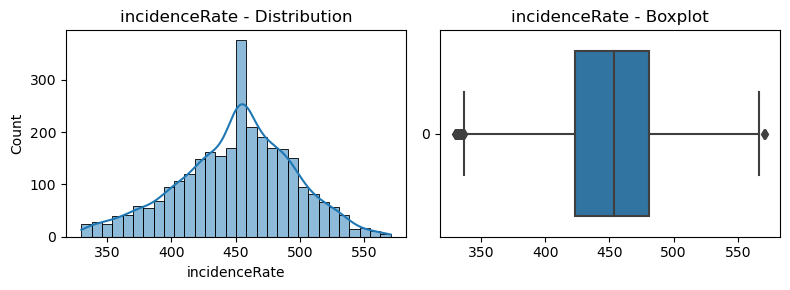

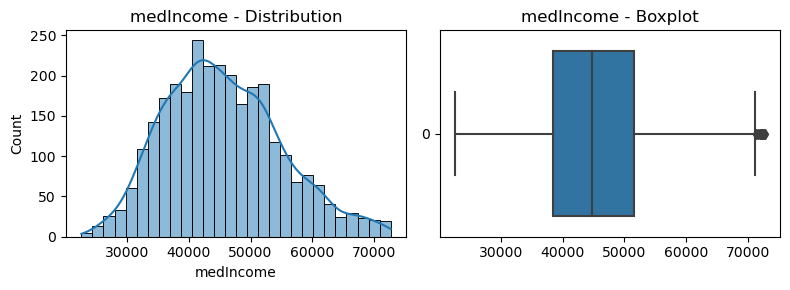

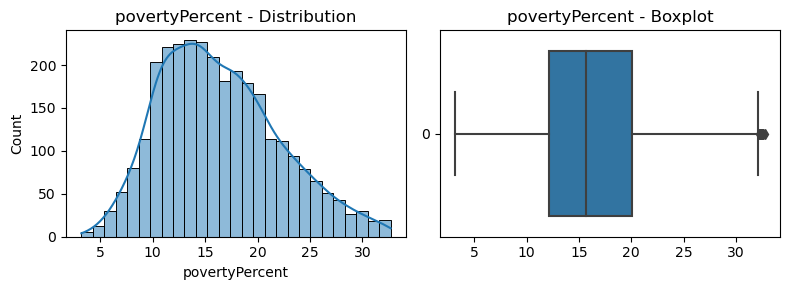

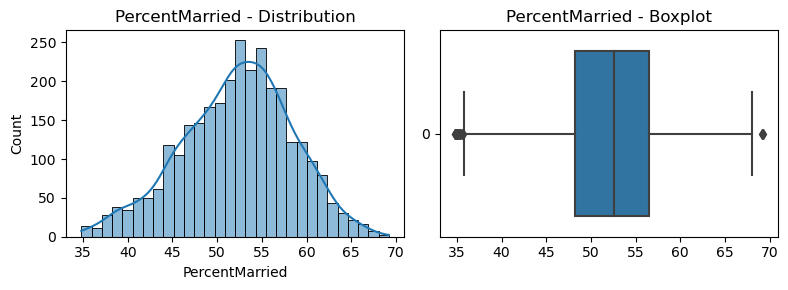

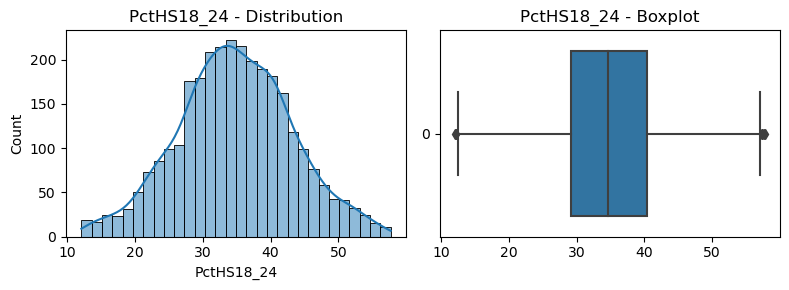

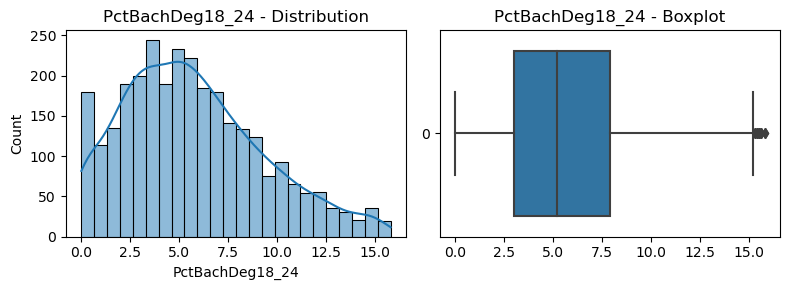

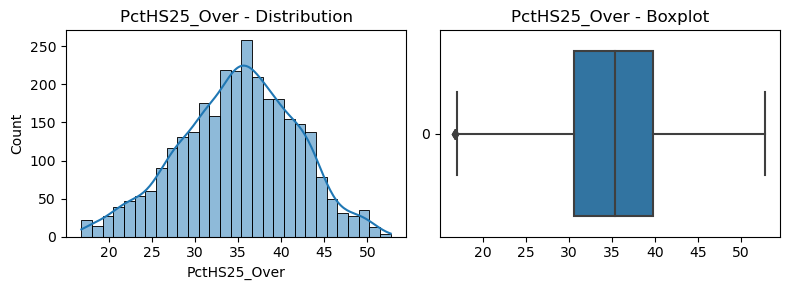

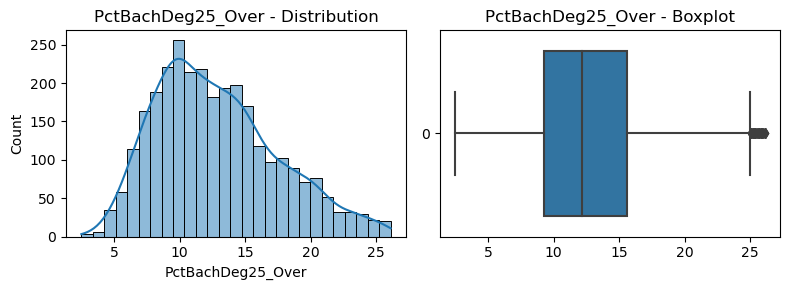

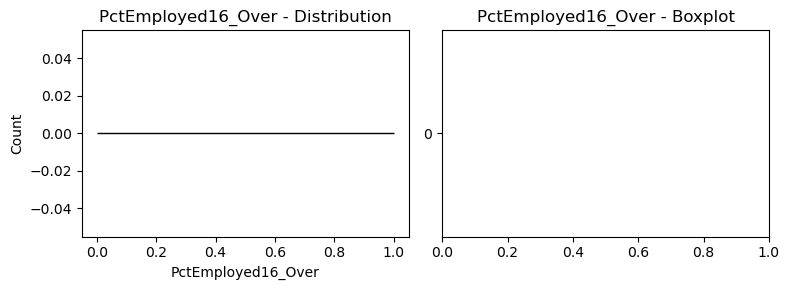

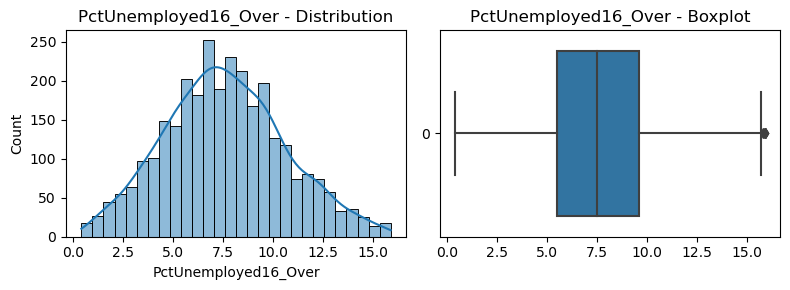

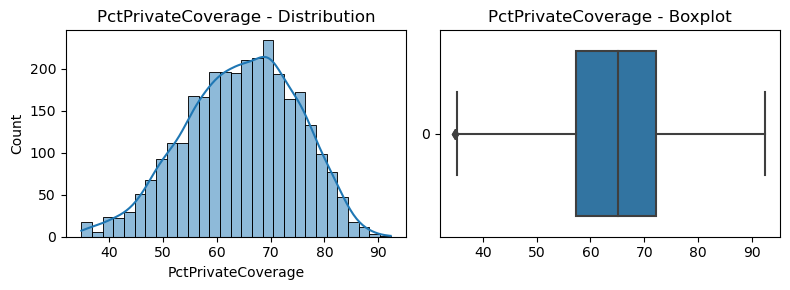

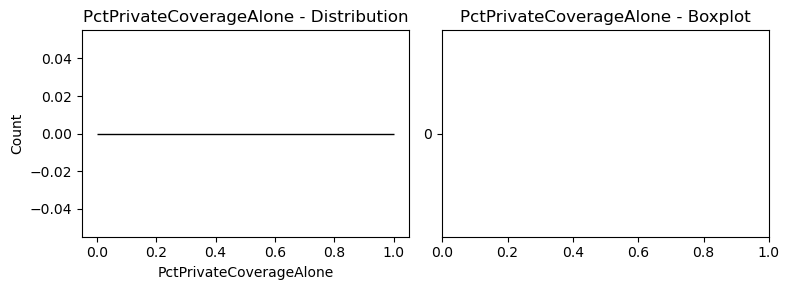

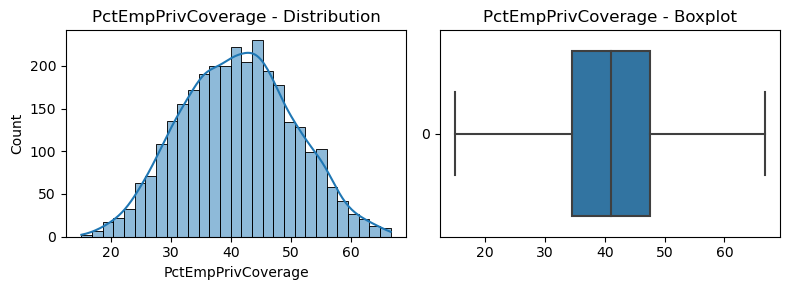

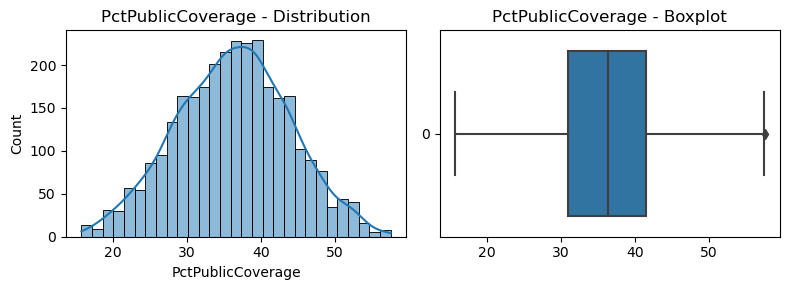

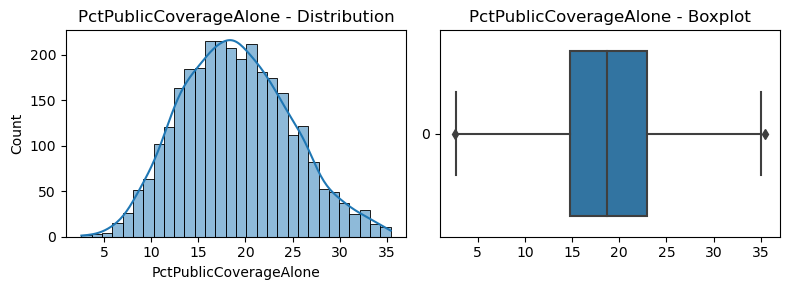

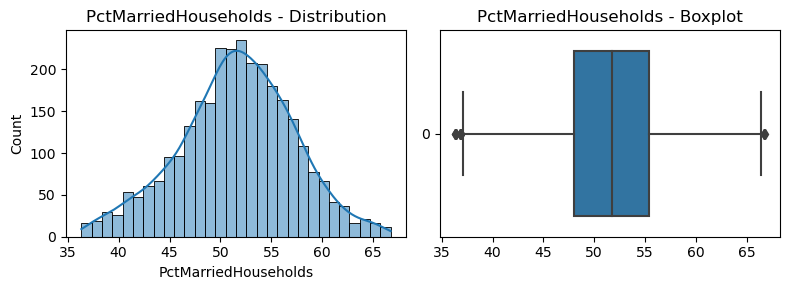

In [21]:
for column in selected:
    if column == 'binnedInc' or column =='City' or column == 'Geography' or column == 'District':
        continue
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))  
    sns.histplot(data=DF[column], kde=True, ax=axes[0])
    sns.boxplot(data=DF[column], ax=axes[1], orient='h')
    axes[0].set_title(f'{column} - Distribution')
    axes[1].set_title(f'{column} - Boxplot')
    plt.tight_layout()
    plt.show()

###  Z-score

In [22]:
# upper_limit = DF["PctMarriedHouseholds"].height.mean() + 3*DF.height.std()
# lower_limit = DF.height.mean() - 3*DF.height.std()